# 🌳 Decision Tree Theory 

## 🌱 1. Introduction to Decision Trees

A **Decision Tree** is a **supervised learning algorithm** used for both **classification** and **regression** problems. It is a **non-linear separating algorithm which separates the data which is not separable by linear algorithms**
- **It is a greedy Algorithm which looks for the best split at every node (it is greedy for the best outcome at every split)** 

It works like a flowchart or tree structure:
- Each **internal node** represents a *decision rule* on a feature.
- Each **branch** represents an *outcome* of that decision.
- Each **leaf node** represents a *final output* or *prediction*.

---

## 🧩 2. Basic Terminology

| Term | Description |
|------|--------------|
| **Root Node** | The first node that starts the decision process. |
| **Decision Node** | A node where a decision (split) happens. |
| **Leaf Node** | The terminal node where the output is produced. |
| **Splitting** | Dividing the data into subgroups based on a condition. |
| **Pruning** | Removing unnecessary branches to avoid overfitting. |
| **Depth of Tree** | Number of decision levels in the tree. |

##### **✅ The lines (edges) connecting nodes are what count toward the depth of a decision tree.**
- **Depth = number of edges from the root node to the deepest leaf node.**

- **The nodes themselves are not counted — only the connections between them.**
---

## ⚙️ 3. How Decision Trees Work (Step-by-Step)

1. **Start with the entire dataset.**
2. **Choose the best feature** to split the data using a **splitting criterion** (Entropy, Gini, etc.).
3. **Split the dataset** into subsets.
4. **Repeat recursively** for each subset until:
   - All samples in a node belong to one class, or  
   - The maximum depth or minimum samples per node is reached.

---

## 📊 4. Splitting Criteria

The key part of tree construction is selecting the **best attribute** at each step.

### 4.1 Entropy (Used in ID3 Algorithm)
It measures the impurity or randomness in the dataset.

$$
Entropy(S) = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

Where:
- $p_i$ = proportion of samples belonging to class *i*.

If all data points are of one class → Entropy = 0 (pure).

### 4.2 Gini Index (Used in CART)
Measures impurity too, but in a different way.

$$
Gini(S) = 1 - \sum_{i=1}^{C} (p_i)^2
$$

Lower Gini = purer node.

---

## ⚖️ 5. Information Gain

It measures the **reduction in entropy** after splitting on an attribute.

$$
InformationGain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)
$$

The attribute with **highest information gain** is chosen for splitting.

---


# 🌳 CART Algorithm 

---

## 🧠 6. What is the CART Algorithm?

**CART** stands for **Classification and Regression Trees**.  
It is a **Supervised Machine Learning algorithm** used to build **Decision Trees** for both:

- **Classification tasks** (when the target variable is categorical)
- **Regression tasks** (when the target variable is continuous)

CART was introduced by **Breiman et al. (1984)** and is one of the **most popular** Decision Tree algorithms (used in `sklearn.tree.DecisionTreeClassifier` and `DecisionTreeRegressor`).

---

## 🌈 7. CART Intuition

The main goal of CART is to **split the dataset into subsets** such that the **data in each subset is as pure as possible** (i.e., contains mostly one class for classification or low variance for regression).

CART uses a **binary tree structure**, meaning:
- Each **internal node** splits the data into **two child nodes**.
- Each **leaf node** gives the **final prediction**.

---

## ⚙️ 8. How CART Works (Step-by-Step)

Let’s go through the process step by step 👇

### 🪜 Step 1: Select the Best Feature and Split Point

At each node, CART checks **all features** and **possible split points** to find the one that **maximizes the purity gain** (or minimizes impurity).

- For **classification**, CART uses **Gini Impurity** (default) or **Entropy**.
- For **regression**, CART uses **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)**.

---

### 🧩 Step 2: Splitting the Data

Once the **best split** is found, the data is divided into **two child nodes**:
- Left node → data where `feature <= threshold`
- Right node → data where `feature > threshold`

This process is **recursive**, meaning:
- Each child node again becomes a parent node for further splits.

---

### 🧱 Step 3: 🚫 Stopping Criteria and Pruning

If we keep splitting, the tree becomes too deep → **Overfitting**.

### 🧱 Stopping Criteria

To prevent overfitting, the tree-growing process can be stopped early using conditions such as:

- **Maximum Depth (`max_depth`)** — Limit the number of levels (splits) in the tree.  
- **Minimum Samples Split (`min_samples_split`)** — The minimum number of samples required to split an internal node.  
- **Minimum Information Gain Threshold** — Stop splitting if the gain from further splits is too small.  
- **Pure Node Condition** — Stop when all samples in a node belong to the same class.


### ✂️ Pruning

Pruning helps simplify the tree by removing unnecessary branches.

- **Pre-Pruning (Early Stopping):**  
  Prevents the tree from growing too large by stopping the splitting process early, based on defined thresholds.

- **Post-Pruning (Reduced Error Pruning):**  
  Builds the full tree first, then removes weak branches using a **validation set** to check if performance improves.

---

🧠 **Goal:** Achieve the best trade-off between **model complexity** and **generalization**.

---

### 🍂 Step 4: Making Predictions

- For **classification**, each leaf node assigns the **majority class** of that node.
- For **regression**, each leaf node assigns the **mean** (or median) of target values.

---

## 🧮 9. Impurity Measures (How CART decides the best split)

CART evaluates how “pure” each split is using impurity measures.  
Lower impurity → purer node ✅

---

### 🔹 A. Gini Impurity (default for classification)

It measures how often a randomly chosen sample from a node would be **incorrectly labeled** if it was labeled according to the distribution of labels in that node.

$$
Gini = 1 - \sum_{i=1}^{C} (p_i)^2
$$

where:

- $( C )$ = number of classes  
- $( p_i )$ = probability of class $( i )$

**Example:**

If node contains 80% Class A and 20% Class B:

$$
Gini = 1 - (0.8)^2 - (0.2)^2 = 0.32
$$

Lower Gini → purer node ✅

---

### 🔹 B. Entropy (alternative measure)

$$
Entropy = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

It’s used by **ID3 / C4.5 algorithms** but can also be used in CART.

---

### 🔹 C. Mean Squared Error (for regression)

For node \( N \):

$$
MSE = \frac{1}{|N|} \sum_{i=1}^{|N|} (y_i - \bar{y})^2
$$

CART tries to minimize MSE when splitting.

---

## ✅ Advantages and Disadvantages

| Advantages                           | Disadvantages                                  |
| ------------------------------------ | ---------------------------------------------- |
| Easy to interpret & visualize        | Prone to overfitting                           |
| Works for numeric & categorical data | Small data changes → big structural changes    |
| Requires little data preprocessing   | Greedy algorithm — may not find global optimum |


## ➡️ Classification Using CART

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
x = pd.DataFrame(data = iris.data, columns =iris.feature_names)

In [7]:
y = iris.target

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### ➡️ **Now Importing DecisionTreeClassifier**

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [11]:
# Initializing CART model (Decision Tree)

cart_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth = 3,
    random_state = 42
)


### 🌟🌟🌟 **NOTE : 👉 Hyperparameters of CART**

| Parameter           | Description                                                                                                             |
| ------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| `criterion`         | `"gini"` (default) or `"entropy"` for classifier; `"squared_error"`, `"friedman_mse"`, `"absolute_error"` for regressor |
| `max_depth`         | Maximum depth of tree                                                                                                   |
| `min_samples_split` | Minimum samples required to split a node                                                                                |
| `min_samples_leaf`  | Minimum samples in each leaf node                                                                                       |
| `max_features`      | Number of features to consider for best split                                                                           |
| `random_state`      | For reproducibility                                                                                                     |


# 🌳 `max_depth` in Decision Trees (CART) & Why we took 3 as the max_depth of the DecisionTreeClassifier

---

## ⭐ What is `max_depth`?
`max_depth` controls **how many levels/splits** a Decision Tree is allowed to grow.  
Depth = number of edges from **root → deepest leaf**.

- **Shallow tree → simpler model (low variance, high bias)**
- **Deep tree → complex model (high variance, low bias)**

---

## ⭐ 1. What Does `max_depth` Depend On?

#### 🔹 A. Number of Features  
**More features → more possible splits → tree can grow deeper.**

#### 🔹 B. Number of Samples  
**More samples → deeper patterns can be learned.**  
**Small datasets → deep trees overfit easily.**

#### 🔹 C. Noise in Data  
**High noise → deeper trees memorize randomness → overfit.**  
**Shallow trees generalize better.**

#### 🔹 D. Class Purity / Separability  
- **Easy-to-separate classes → shallow tree is enough.**  
- **Overlapping classes → deeper tree might be required.**

#### 🔹 E. `min_samples_split` & `min_samples_leaf`  
T**hese parameters indirectly **limit** how deep the tree can grow**.

#### 🔹 F. Bias–Variance Tradeoff  
- **Depth ↓ → bias ↑, variance ↓** 
- **Depth ↑ → bias ↓, variance ↑**

**Choosing depth is balancing this tradeoff.**

---

## ⭐ 2. Why Use `max_depth=3` in the Example?

#### 🔹 1. Prevents Overfitting  
**Decision Trees naturally grow very deep → overfit.**  
**Depth **3** is a safe, controlled value.**

##### 🔹 2. Iris Dataset Is Simple  
- **Only 150 samples**  
- **4 features**  
- **Classes are cleanly separable**  
**Depth 3 or 4 is usually enough for high accuracy.**

#### 🔹 3. Better Interpretability  
**A tree with depth > 4 becomes hard to read.**  
Depth 3 keeps the model **human-readable**.

#### 🔹 4. Great for Visualization & Teaching  
Depth 3:
- Level 0 → Root  
- Level 1 → 2 nodes  
- Level 2 → 4 nodes  
- Level 3 → 8 leaves  

Perfect size to show how CART works.

#### 🔹 5. Practical Rule of Thumb  
For small datasets:  
- Depth **3–6** works best.

---

## ⭐ Summary Table

| Factor | Effect on `max_depth` |
|--------|------------------------|
| More features | Allows deeper trees |
| More samples | Can support deeper trees |
| More noise | Requires shallower trees |
| Easy separability | Shallow tree enough |
| `min_samples_split`, `min_samples_leaf` | Reduce depth |
| Interpretability | Prefer shallow depth |
| Overfitting risk | Higher at high depth |

---

## ⭐ Final Takeaway

> **`max_depth=3` was chosen because the dataset is simple, it prevents overfitting, keeps the tree interpretable, and makes visualization easy for learning CART.**

---


In [12]:
# Training Model

cart_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [13]:
#predicting

y_pred = cart_clf.predict(x_test)
y_pred_proba = cart_clf.predict_proba(x_test)

In [14]:
# Evaluation 

cart_clf.score(x_test, y_test)

1.0

In [15]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, log_loss,roc_auc_score

In [16]:
acc = accuracy_score(y_test,y_pred)
class_report = classification_report(y_test, y_pred)
mlt_cnf = multilabel_confusion_matrix(y_test, y_pred)
loss= log_loss(y_test, y_pred_proba)
ra_score = roc_auc_score(y_test, y_pred_proba, multi_class = "ovr")

In [17]:
print(f"Accuracy : {acc}\nClassification Report:\n{class_report}\nMulti-Label Confusion Matrix :\n{mlt_cnf}\n\nLog Loss : {loss}\nROC AUC Score : {ra_score}")

Accuracy : 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Multi-Label Confusion Matrix :
[[[20  0]
  [ 0 10]]

 [[21  0]
  [ 0  9]]

 [[19  0]
  [ 0 11]]]

Log Loss : 0.03373366953885748
ROC AUC Score : 1.0


### **Visualization of Confusion Matrices**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

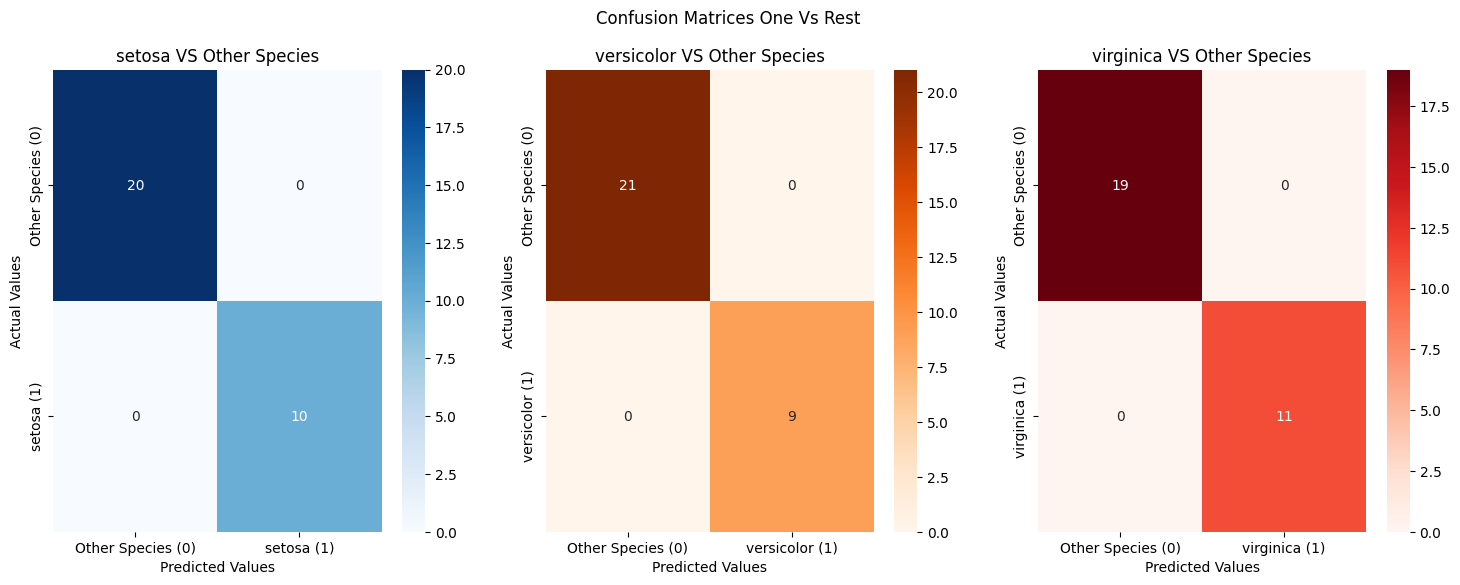

In [28]:
class_labels = iris.target_names

fig, axes = plt.subplots(1,3, figsize= (18,6))

fig.suptitle("Confusion Matrices One Vs Rest")

for i in range(len(class_labels)):
    sns.heatmap(
        ax = axes[i],
        data = mlt_cnf[i],
        annot = True,
        cmap = ["Blues", "Oranges", "Reds"][i],
        xticklabels=[ "Other Species (0)" ,f"{class_labels[i]} (1)"],
        yticklabels=[ "Other Species (0)" ,f"{class_labels[i]} (1)"],
        # cbar = False
    ).set_title(f"{class_labels[i]} VS Other Species")
    axes[i].set_xlabel("Predicted Values")
    axes[i].set_ylabel("Actual Values")
    
    
    
plt.show()    

### **Now Visualizing Tree**

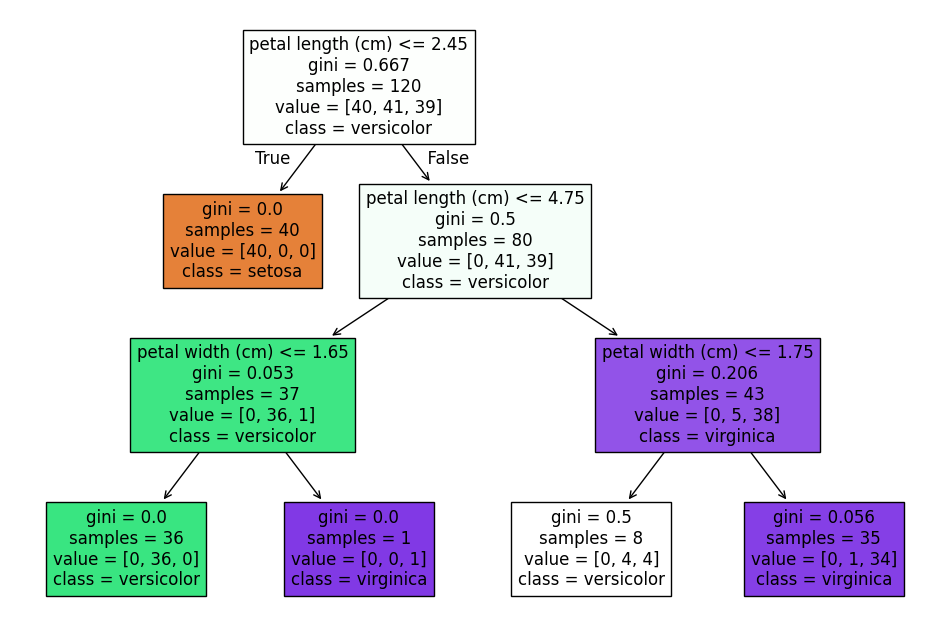

In [20]:
plt.figure(figsize = (12, 8))
plot_tree(
    decision_tree = cart_clf,
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    filled = True,
    
    )

plt.show()

# 📘 Curated Notes: **Gini Impurity & How CART Chooses the Best Split in the above Tree**

---

# 🌳 1. What is Gini Impurity?

Gini impurity is a measure of **how mixed** the classes are inside a node.  
It tells us how “impure” a node is.

- **Gini = 0** → perfectly pure (only one class)  
- **Gini is higher** → more mixed classes
- **Gini max = $1 - \frac{1}{C}$ → maximum impurity (all classes equally mixed)**
- **GINI does NOT care about labels, only class proportions**

### **Formula**


$ Gini = 1 - \sum_{i=1}^{C} p_i^2 $

Where:
- $(p_i)$ = probability of class $(i)$ in the node  
- $(C)$ = number of classes  

---

# 🌿 2. What Does Gini Measure?

Gini impurity measures the **probability that two randomly chosen samples will have different classes**.

Equivalently:
- If one class dominates → $(\sum p_i^2)$ is large → Gini is small  
- If classes are equal → $(\sum p_i^2)$ is small → Gini is large  

It quantifies **how clean or messy** the node is.

---

# 🌱 3. How CART Uses Gini to Choose a Split

At each node, CART performs these steps:

### **Step 1 — For each feature**
Sort all unique values.

### **Step 2 — For each possible threshold**
Try splitting:

- Left node: feature <= threshold  
- Right node: feature > threshold  

### **Step 3 — Compute Gini of left & right children**


$$ G_L = 1 - \sum p_{Li}^2 $$

$$
G_R = 1 - \sum p_{Ri}^2
$$

### **Step 4 — Compute weighted average Gini**

$$
G_{split} = 
\frac{N_L}{N}G_L + \frac{N_R}{N}G_R
$$

Where:
- $(N_L)$ = samples in left child  
- $(N_R)$ = samples in right child  
- $(N)$ = samples in parent  

### **Step 5 — Compute impurity reduction (Gini Gain)**

- **Splitting Criterion**: When the CART algorithm decides how to split an impure parent node into two child nodes, 
- it selects the split that results in the greatest reduction in Gini Impurity, which is called the **Gini Gain**. 
- **The Gini Gain is calculated using the Gini impurity of the parent node and the weighted average of the Gini impurities of the two resulting child nodes.**

$$
\Delta Gini = G_{parent} - G_{split}
$$

### **Step 6 — Choose the split with Maximum Impurity Reduction**

CART picks the split with the **lowest weighted Gini**  
→ or equivalently the **highest impurity reduction**.

---

# 🍁 4. Why Weighted Gini is Critical

CART does **NOT**:

- ❌ choose split with lowest Gini of one child  
- ❌ choose split where one node becomes pure  
- ❌ choose split based on minimum Gini among children  

CART **always** chooses split using the **weighted average**:

$$
G_{split} = 
\frac{N_L}{N}G_L + \frac{N_R}{N}G_R
$$

### Why?

Because a split must improve the **whole dataset**, not just one small child.

### Example:
- Left child pure but tiny (3 samples)
- Right child messy (97 samples)

Weighted Gini stays high → split is bad.  
CART will **not choose it**.

---

# 🌸 5. Example: Why the Iris Setosa Split Works Perfectly

Threshold chosen by CART:

**petal length <= 2.45**


Why?

Because splitting here gives:

### Left node:
- 40 samples  
- all setosa  
- Gini = 0.0 (pure)

### Right node:
- 80 samples  
- mix of versicolor & virginica  
- Gini ≈ 0.5

### Weighted Gini:

$$
G_{split} = \frac{40}{120}\cdot0 + \frac{80}{120}\cdot0.5 = 0.3333
$$

### Parent node gini:

$$
G_{parent} = 0.667
$$

### Impurity reduction:

$$
\Delta Gini = 0.667 - 0.3333 = 0.3337
$$

This is a **massive** reduction — among the largest possible.  
Therefore CART selects this split.

---

# 🌲 6. Why This Split Collects *All* Setosa

Biological pattern in the dataset:

- All setosa have petal length between 1.0 and 2.45  
- No versicolor or virginica fall in this range  

Thus:
- Left child becomes perfectly pure → `[40,0,0]`  
- Right child contains the other two species  

CART didn't "know" biology —  
it simply picked the split giving the best **mathematical purity**.

---

# 🌻 7. CART Split Selection — One-Line Summary

**CART chooses the split that produces the lowest weighted Gini impurity after splitting or, equivalently, the largest impurity reduction. Weighted Gini is the ONLY criterion used to judge split quality.**

---

# ⭐ So how many thresholds does CART try?

#### 👉 CART only considers thresholds between existing sorted feature values.

If a feature has:

- **n samples** 
- **k unique sorted values**

**CART tests exactly (k − 1) possible thresholds.**

**Not infinite.**

---

# 🍀 8. Final Key Points to Remember

- Gini impurity measures **class mixing**.  
- Gini = 0 means **perfect purity**.  
- CART tries **every threshold on every feature**.  
- CART computes **weighted Gini** for every split.  
- CART chooses the threshold with **maximum impurity reduction**.  
- CART does **not** use single-node Gini.  
- CART's decisions are **completely mathematical**, not heuristic.  

---





## **🧩 10. Advantages of CART**

✅ Works for both classification and regression<br>
✅ Handles numerical and categorical data<br>
✅ Easy to interpret and visualize<br>
✅ Requires less data preprocessing (no need to normalize)<br>
✅ Used as base in Ensemble methods like Random Forest, XGBoost, etc.

## **⚠️ 11. Disadvantages of CART**

❌ Can easily overfit (high variance)<br>
❌ Slightly unstable — small data changes can lead to different splits<br>
❌ Biased towards features with many levels (categories)<br>
❌ Not smooth — piecewise constant decision boundaries